In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib import font_manager
import pandas as pd
import joblib
import argparse
import time
from matplotlib.ticker import ScalarFormatter, FuncFormatter

from params_prob import *
from ECO_function import *

debug = True  



In [4]:
## Read xlsx and dump the values to 4 variables 

def read_excel_data(filename):
    """Reads an Excel file and assigns values to variables based on column names.

    Args:
        filename (str): The path to the Excel file.

    Returns:
        tuple: A tuple containing the values for def_den, carbon_int, and epa.
    """

    try:
        # Read the Excel file into a Pandas DataFrame
        df = pd.read_excel(filename)

        # Extract values based on column names
        def_den = df['defden'].values
        carbon_int = df['CarbonInt'].values
        epa = df['EPA'].values
        gpa = df['GPA'].values

        return def_den, carbon_int, epa,gpa

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found in the Excel file.")
        return None

# Example usage
filename = 'example_final_params_data_50.xlsx'  # Replace with your actual file name
#filename = 'boxplot/final_box_plot/generated_files/data/final_params_data_100.xlsx'  # Replace with your actual file name
result = read_excel_data(filename)

if result:
    def_den, carbon_int, epa, gpa = result
    print("def-den:", def_den)
    print("def-den length",len(def_den))
    print("carbon_int:", carbon_int)
    print("carbon int len", len(carbon_int))
    print("epa:", epa)
    print("epa len",len(epa))
    print("gpa:", gpa)
    print("gpa len",len(gpa))

def-den: [0.1535 0.147  0.1145 0.1535 0.186  0.1535 0.121  0.3095 0.199  0.121
 0.108  0.4005 0.355  0.251  0.095  0.1795 0.1145 0.3095 0.108  0.3745
 0.1145 0.134  0.1405 0.4135 0.3485 0.1275 0.108  0.16   0.1535 0.1925
 0.1795 0.121  0.095  0.1275 0.147  0.1405 0.2055 0.147  0.1535 0.108
 0.1015 0.108  0.3875 0.095  0.186  0.134  0.147  0.108  0.186  0.134 ]
def-den length 50
carbon_int: [663.484524 647.110838 637.479258 657.705576 660.59505  645.184522
 665.41084  671.189788 683.710842 645.184522 647.110838 661.558208
 646.14768  656.742418 649.037154 649.037154 651.926628 644.221364
 672.152946 665.41084  640.368732 657.705576 654.816102 649.037154
 646.14768  648.073996 653.852944 650.96347  641.33189  645.184522
 638.442416 663.484524 637.479258 666.373998 650.96347  665.41084
 648.073996 661.558208 663.484524 658.668734 679.85821  664.447682
 644.221364 672.152946 677.931894 658.668734 647.110838 653.852944
 650.000312 637.479258]
carbon int len 50
epa: [1.13076923 0.99230769 1.

In [12]:

def run_greenfpga_asic(epa_loop,gpa_loop,dd_loop,ci_loop,napp,ndes,nlife,power,chip_area):
        #Initialize variables
        embodied_carbon = []
        operational_carbon = []
        total_carbon = []
        total_10  = []
        total_20  = []
        total_30  = []
        total_40  = []
        total_50  = []
        total_60  = []
        total_70  = []
        total_80  = []
        total_90  = []
        total_100 = []
        
        #if debug:
        #        print("-------------------------")
        #        print("napp",napp)
        #        print("ndes",ndes)
        #        print("nlife",nlife)
        #        print("power",power)
        #        print("chip_area",chip_area)
        #        print("-------------------------")

        defden_number = def_den[dd_loop]
        gpa_number = gpa[gpa_loop]
        epa_number = epa[epa_loop]
        ci_number = carbon_int[ci_loop]
        print(ci_loop)
        args = argparse.Namespace(design_dir='test_example/GPU_analysis/',
                                  des_type='ASIC',
                                  des_cfp_ty='NEW',
                                  num_app=napp,
                                  num_des=ndes,
                                  num_lifetime=nlife,
                                  power=power,
                                  chip_area=chip_area,
                                  ope_vol=1000000,
                                  emb_vol=1000000,
                                  dc_val=1,
                                  nfpga=None,
                                  node=10,
                                  mem_cap=None,
                                  uncertain_off=False,
                                  epa=epa_number,
                                  defect_density=defden_number,
                                  gpa=epa_number,
                                  carbon_intensity=ci_number)
        #embc,opec,totc = greenfpga_func(args)
        embc,opec,totc,t10,t20,t30,t40,t50,t60,t70,t80,t90,t100 = greenfpga_func(args)
        embodied_carbon.append(embc)
        operational_carbon.append(opec)
        total_carbon.append(totc)
        total_10.append(t10)
        total_20.append(t20)
        total_30.append(t30)
        total_40.append(t40)
        total_50.append(t50)
        total_60.append(t60)
        total_70.append(t70)
        total_80.append(t80)
        total_90.append(t90)
        total_100.append(t100)

        fin_df_asic = pd.DataFrame(
                            {'Emb_Carbon': embodied_carbon,
                            'Operational_Carbon': operational_carbon,
                            'Total_Carbon' : total_carbon,
                            'Total_0.1_Ope' : total_10,
                            'Total_0.2_Ope' : total_20,
                            'Total_0.3_Ope' : total_30,
                            'Total_0.4_Ope' : total_40,
                            'Total_0.5_Ope' : total_50,
                            'Total_0.6_Ope' : total_60,
                            'Total_0.7_Ope' : total_70,
                            'Total_0.8_Ope' : total_80,
                            'Total_0.9_Ope' : total_90,
                            'Total_1.0_Ope' : total_100,
                            'Loop variables' : f"epa_loop_{epa_loop}__gpa_loop_{gpa_loop}__ci_loop_{ci_loop}__dd_loop_{dd_loop}",
                            'Loop_values': f"EPA_{epa_number}__GPA_{gpa_number}__CI_{ci_number}__DefDen_{defden_number}"})

        return fin_df_asic

In [13]:
#Initialize knobs, DO NOT TOUCH 
ASIC_ASIC = False
ASIC_FPGA = False
GPU_GPU   = False 
GPU_FPGA  = False 
CPU_CPU   = False  
CPU_FPGA  = False 

#ASIC 
#ASIC_ASIC = True
#ASIC_FPGA = True

#GPU
GPU_GPU = True
GPU_FPGA = True

#CPU
#CPU_CPU = True
#CPU_FPGA = True

if ASIC_ASIC:
    NumApps_arr =     [1,2,3,4,5,6,7,8]
    NumDes_arr =      [1,2,3,4,5,6,7,8]
    NumLifetime_arr = [2,4,6,8,10,12,14,16]
    power = 10
    area = 100
    type='asic'
if ASIC_FPGA:
    NumApps_arr_fp =     [1,2,3,4,5,6,7,8]
    NumDes_arr_fp =      [1,1,1,1,1,1,1,1]
    NumLifetime_arr_fp = [2,4,6,8,10,12,14,16]
    power_fp = 30
    area_fp = 400
    type_fp='fpga_asic'

if GPU_GPU:
    #NumApps_arr =     [1,2,3,4,5,6,7,8]
    #NumDes_arr =      [1,1,2,2,3,3,4,4]
    #NumLifetime_arr = [2,4,6,8,10,12,14,16]
    NumApps_arr =     [4,8,12,16,20,24,28,32]
    NumDes_arr =      [2,4,6,8,10,12,14,16]
    NumLifetime_arr = [8,16,24,32,40,48,56,72]
    power = 116.6
    area = 48.9
    type='gpu'
if GPU_FPGA:
    #NumApps_arr_fp =     [1,2,3,4,5,6,7,8]
    #NumDes_arr_fp =      [1,1,1,1,1,1,1,1]
    #NumLifetime_arr_fp = [2,4,6,8,10,12,14,16]
    NumApps_arr_fp =     [4,8,12,16,20,24,28,32]
    NumDes_arr_fp =      [1,1,1,1,1,1,1,1]
    NumLifetime_arr_fp = [8,16,24,32,40,48,56,72]
    power_fp = 120
    area_fp = 214.89
    type_fp='fpga_gpu'
    
if CPU_CPU:
    NumApps_arr =     [1,2,3,4,5,6,7,8]
    NumDes_arr =      [1,1,1,1,1,1,1,1]
    NumLifetime_arr = [2,4,6,8,10,12,14,16]
    power = 170
    area = 214
    type='cpu'
if CPU_FPGA:
    NumApps_arr_fp =     [1,2,3,4,5,6,7,8]
    NumDes_arr_fp =      [1,1,1,1,1,1,1,1]
    NumLifetime_arr_fp = [2,4,6,8,10,12,14,16]
    power_fp = 0.9717
    area_fp = 600
    type_fp = 'fpga_cpu'

print("Parameter ranges for current device type")
print("NumApps_arr",NumApps_arr)
print("NumDes_arr",NumDes_arr)
print("NumLifetime_arr",NumLifetime_arr)
print("power",power)
print("area",area)
print("type",type)
print("-------------------------")

print("Parameter ranges for current FPGA type")
print("NumApps_arr FPGA",NumApps_arr_fp)
print("NumDes_arr FPGA",NumDes_arr_fp)
print("NumLifetime_arr FPGA",NumLifetime_arr_fp)
print("power FPGA",power_fp)
print("area FPGA",area_fp)
print("type",type_fp)
print("-------------------------")


Parameter ranges for current device type
NumApps_arr [4, 8, 12, 16, 20, 24, 28, 32]
NumDes_arr [2, 4, 6, 8, 10, 12, 14, 16]
NumLifetime_arr [8, 16, 24, 32, 40, 48, 56, 72]
power 116.6
area 48.9
type gpu
-------------------------
Parameter ranges for current FPGA type
NumApps_arr FPGA [4, 8, 12, 16, 20, 24, 28, 32]
NumDes_arr FPGA [1, 1, 1, 1, 1, 1, 1, 1]
NumLifetime_arr FPGA [8, 16, 24, 32, 40, 48, 56, 72]
power FPGA 120
area FPGA 214.89
type fpga_gpu
-------------------------


In [7]:
index = np.random.randint(0,49,(10000,4))
print(index)
for entry in index:
    print(entry[0])
    print(entry[1])
    print(entry[2])
    print(entry[3])

[[41 42 47  1]
 [30 28 18 33]
 [ 7 43  4 33]
 ...
 [36  3 40 11]
 [44 31 17 14]
 [47 31 14 40]]
41
42
47
1
30
28
18
33
7
43
4
33
23
48
20
11
46
16
7
18
22
5
5
39
30
10
19
11
37
20
28
23
44
13
38
14
8
37
34
23
2
44
18
0
32
18
3
30
37
18
14
17
9
39
18
36
37
12
9
37
30
32
41
7
13
4
27
36
48
41
36
45
25
14
46
1
42
22
11
4
3
14
13
3
5
32
17
41
32
35
2
41
28
32
8
23
48
39
19
10
9
43
25
20
38
38
7
34
33
0
29
34
13
4
3
48
28
26
17
2
33
5
3
15
38
30
26
20
32
28
15
29
18
18
36
36
41
11
38
30
48
26
38
29
40
31
33
31
29
40
34
40
40
44
41
34
30
16
24
45
33
15
35
23
24
17
27
34
13
37
47
29
1
7
37
27
14
6
16
17
21
44
8
6
45
14
44
34
6
35
39
26
42
20
8
10
39
29
15
44
16
48
20
39
13
26
38
25
14
14
10
25
41
13
25
18
6
16
32
31
5
33
48
30
32
46
5
44
43
5
40
29
18
28
37
29
38
37
9
36
42
21
0
31
2
3
22
31
29
41
3
30
33
12
28
46
23
4
44
24
25
39
7
35
19
43
47
12
43
46
14
43
21
27
11
31
38
2
41
1
15
25
23
23
34
14
25
30
28
2
26
20
42
11
16
2
12
37
1
48
6
24
44
22
27
39
44
27
35
6
28
25
6
41
36
34
46
11
28
8


In [15]:
#Constant params to send to code
print("Parameter ranges for current device type")
print("NumApps_arr",NumApps_arr)
print("NumDes_arr",NumDes_arr)
print("NumLifetime_arr",NumLifetime_arr)
print("power",power)
print("area",area)
print("type",type)
print("-------------------------")

print("Parameter ranges for current FPGA type")
print("NumApps_arr FPGA",NumApps_arr_fp)
print("NumDes_arr FPGA",NumDes_arr_fp)
print("NumLifetime_arr FPGA",NumLifetime_arr_fp)
print("power FPGA",power_fp)
print("area FPGA",area_fp)
print("type_fp",type_fp)
print("-------------------------")


# Create an empty DataFrame to store the results
total_cfp_df = pd.DataFrame()
total_cfp_df_fp = pd.DataFrame()

#For ASIC/GPU/CPU
print("Starting ASIC/GPU/CPU")
for i in range(len(NumApps_arr)):
#for i in range(0,2):
    print("i",i)
    NumApps = NumApps_arr[i]
    NumDes = NumDes_arr[i]
    NumLifetime = NumLifetime_arr[i]
    
    print("NumApps", NumApps) if debug else None
    
    #Start time
    start = time.time()

    #Run jobs in parallel
    run_values_asic = joblib.Parallel(n_jobs=-1)(joblib.delayed(run_greenfpga_asic)(entry[0],entry[1],entry[2],entry[3],napp=NumApps,ndes=NumDes,nlife=NumLifetime,power=power,chip_area=area) for entry in index)

    #Convert to DataFrame
    final_df = pd.concat(run_values_asic, ignore_index=True)
    
    if debug:
        #Dump to excel
        #final_df.to_excel(f"temp_debug_dir/CFP_data_ASIC_FPGA_Napp_{NumApps}_sample_10_asic.xlsx",index=False)
        #final_df.to_excel(f"temp_debug_dir/CFP_data_GPU_FPGA_Napp_{NumApps}_sample_10000_asic_randomsample.xlsx",index=False)
        print("Dump finish")

    # Add the 'Total_0.2_Ope' column to dist_df with the corresponding column name
    if GPU_GPU:
        total_cfp_df[f'NumApp{i}'] = final_df['Total_0.6_Ope']  
    else:
        total_cfp_df[f'NumApp{i}'] = final_df['Total_0.2_Ope']  

    end_time = time.time()  # End time for performance measurement
    elapsed_time = end_time - start
    print(f"Elapsed time for processing: {elapsed_time:.2f} seconds")
   
#FPGA
print("Starting FPGA")
for j in range(len(NumApps_arr_fp)):
#for j in range(0,2):
    print("j",j)
    NumApps_fp = NumApps_arr_fp[j]
    NumDes_fp = NumDes_arr_fp[j]
    NumLifetime_fp = NumLifetime_arr_fp[j]
   
   
    print("NumApps_fp", NumApps_fp) if debug else None
    
    #Start time
    start = time.time()

    #Run jobs in parallel
    run_values_fpga = joblib.Parallel(n_jobs=-1)(joblib.delayed(run_greenfpga_asic)(entry_fpga[0],entry_fpga[1],entry_fpga[2],entry_fpga[3],napp=NumApps_fp,ndes=NumDes_fp,nlife=NumLifetime_fp,power=power_fp,chip_area=area_fp) for entry_fpga in index)

    #Convert to DataFrame
    final_df_fp = pd.concat(run_values_fpga, ignore_index=True)
    
    if debug:
        #Dump to excel
        #final_df_fp.to_excel(f"temp_debug_dir/CFP_data_ASIC_FPGA_Napp_{NumApps_fp}_sample_10_fpga.xlsx",index=False)
        #final_df_fp.to_excel(f"temp_debug_dir/CFP_data_GPU_FPGA_Napp_{NumApps_fp}_sample_10000_fpga_randomsample.xlsx",index=False)
        print("Dump finish")

    # Add the 'Total_0.2_Ope' column to dist_df with the corresponding column name
    if GPU_GPU:
        total_cfp_df_fp[f'NumApp{j}'] = final_df_fp['Total_0.6_Ope']  
    else:
        total_cfp_df_fp[f'NumApp{j}'] = final_df_fp['Total_0.2_Ope']  

    end_time = time.time()  # End time for performance measurement
    elapsed_time = end_time - start
    print(f"Elapsed time for processing: {elapsed_time:.2f} seconds")

#if debug:
    #total_cfp_df.to_excel(f"temp_debug_dir/GPU_sample_10000_randomsample_GPUvFPGA.xlsx",index=False)
    #total_cfp_df_fp.to_excel(f"temp_debug_dir/FPGA_sample_10000_randomsample_GPUvFPGA.xlsx",index=False) 

Parameter ranges for current device type
NumApps_arr [4, 8, 12, 16, 20, 24, 28, 32]
NumDes_arr [2, 4, 6, 8, 10, 12, 14, 16]
NumLifetime_arr [8, 16, 24, 32, 40, 48, 56, 72]
power 116.6
area 48.9
type gpu
-------------------------
Parameter ranges for current FPGA type
NumApps_arr FPGA [4, 8, 12, 16, 20, 24, 28, 32]
NumDes_arr FPGA [1, 1, 1, 1, 1, 1, 1, 1]
NumLifetime_arr FPGA [8, 16, 24, 32, 40, 48, 56, 72]
power FPGA 120
area FPGA 214.89
type_fp fpga_gpu
-------------------------
Starting ASIC/GPU/CPU
i 0
NumApps 4
11
7
23
36
37
23
1833

1
33
36
11
36
41
23
24
45
41
35
12
3143

1
39
20
23
30
20
2
48
27
22
20
25
34
17
14
8
4
0
35
28
34
1
14
38
12
5
47
43
30
25
10
18
2
11
43
33
4
2
30
34
6
42
29
34
38
5
29
45
3
16
1
36
33
48
48
17
34
1
9
23
34
12
29
25
31
41
3
17
6
4
7
42
22
6
40
15
45
27
17
10
29
31
25
34
34
30
26
29
39
36
31
25
44
18
29
44


KeyError: 'FE_dev_time'

In [58]:
asic_box_data_list = []
fpga_box_data_list = []

for column_name in total_cfp_df.columns:
    asic_box_data_list.append(total_cfp_df[column_name].tolist())

for column_name_fp in total_cfp_df_fp.columns:
    fpga_box_data_list.append(total_cfp_df_fp[column_name_fp].tolist())

print(min(asic_box_data_list)) if debug else None
print(len(asic_box_data_list))
print(len(asic_box_data_list[0]))
print(max(fpga_box_data_list)) if debug else None
print(len(fpga_box_data_list))
print(len(fpga_box_data_list[0]))
print("Max0", max(fpga_box_data_list[0]))
print("Max1", max(fpga_box_data_list[1]))
print("Max2", max(fpga_box_data_list[2]))
print("Max3", max(fpga_box_data_list[3]))
print("Max4", max(fpga_box_data_list[4]))
print("Max5", max(fpga_box_data_list[5]))
print("Max6", max(fpga_box_data_list[6]))
print("Min", min(fpga_box_data_list[0]))

[209974918.0141051, 212458113.1424623, 210308085.743096, 213306671.93522653, 210847539.7634597, 208644102.38954642, 213828384.6344428, 212185561.29730225, 219167763.92696506, 208800789.9067805, 212161821.84257028, 210221571.6794484, 213670317.05268896, 211943059.03859127, 211960821.08540928, 210376178.77742007, 211483840.9273931, 212249555.50608373, 211910970.1703434, 215140838.39598745, 208777921.4549355, 213330703.4098398, 213620399.11039716, 212987970.48998338, 212256744.2851249, 215365635.42962718, 213057925.29300427, 208422222.9919994, 209120691.22126064, 216464184.9234238, 215242372.23346376, 214879326.68830973, 213332518.01624638, 210964671.49023157, 215154275.87701097, 212269368.66951713, 211315913.58220324, 209879161.4942998, 208790776.59626523, 212254192.17812505, 210626582.9529286, 211738159.0885712, 212037417.28672716, 215345392.14111236, 220035905.5343386, 208695550.65708876, 211147902.6683176, 212715087.49960738, 209818679.2302063, 206930126.69024345, 211616841.11891913, 

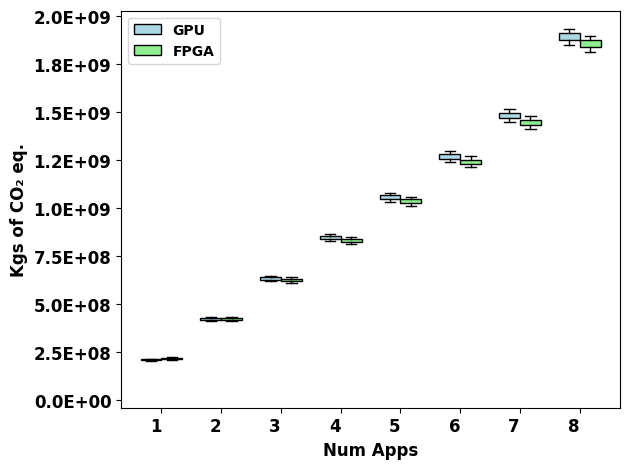

In [62]:

#Creating list 
#asic_data = [Napp_1_asic, Napp_2_asic, Napp_3_asic, Napp_4_asic, Napp_5_asic, Napp_6_asic, Napp_7_asic, Napp_8_asic]
#fpga_data = [Napp_1_fpga, Napp_2_fpga, Napp_3_fpga, Napp_4_fpga, Napp_5_fpga, Napp_6_fpga, Napp_7_fpga, Napp_8_fpga]
#print(len(asic_data))
#print(len(fpga_data))

asic_data = asic_box_data_list
fpga_data = fpga_box_data_list
categories = [1,2,3,4,5,6,7,8]
#categories = [1,2]


#ASIC
#asic_user_median = [9.57E6, 1.91E7, 2.87E7, 3.83E7, 4.78E7, 5.74E7, 6.7E7, 7.66E7]
#fpga_user_median = [3.1E7, 3.53E7, 3.96E7, 4.38E7, 4.81E7, 5.23E7, 5.66E7, 6.08E7]

#GPU
asic_user_median = [5.62E7,	1.06E8,	1.62E8,	2.12E8,	2.68E8,	3.18E8,	3.73E8,	4.23E8]
fpga_user_median = [6.44E7,	1.15E8,	1.66E8,	2.18E8,	2.69E8,	3.20E8,	3.71E8,	4.22E8]

#CPU
#asic_user_median = [3.75E7,	6.15E7,	8.57E7,	1.10E8,	1.34E8,	1.58E8,	1.82E8,	2.06E8]
#fpga_user_median = [5.18E7,	5.20E7,	5.21E7,	5.23E7,	5.24E7,	5.25E7,	5.27E7,	5.28E7]

# Create the figure and axes
fig, ax = plt.subplots()

# Adjust box positions for grouping
positions = np.arange(len(categories))
width = 0.35
offset = width / 2

# Create box plots for ASIC and FPGA
#asic_boxes = ax.boxplot(asic_data, positions=positions - offset, widths=width, patch_artist=True, boxprops=dict(facecolor="lightblue"),showfliers=False)
#fpga_boxes = ax.boxplot(fpga_data, positions=positions + offset, widths=width, patch_artist=True, boxprops=dict(facecolor="lightgreen"),showfliers=False)
asic_boxes = ax.boxplot(asic_data, whis=0.7, positions=positions - offset, widths=width, patch_artist=True, boxprops=dict(facecolor="lightblue"),showfliers=False,usermedians=asic_user_median,medianprops=dict(color='none'))
fpga_boxes = ax.boxplot(fpga_data, whis=0.7, positions=positions + offset, widths=width, patch_artist=True, boxprops=dict(facecolor="lightgreen"),showfliers=False,usermedians=fpga_user_median,medianprops=dict(color='none'))

# Plot median lines
ax.plot(positions - offset, asic_user_median, color="blue", marker="o", label="ASIC Median")
ax.plot(positions + offset, fpga_user_median, color="green", marker="o", label="FPGA Median")

# Set X-axis labels and ticks
ax.set_xticks(positions)
ax.set_xticklabels(categories, rotation=0, ha="right", fontweight='bold',fontsize=12)

# Set labels and title
ax.set_xlabel("Num Apps",fontweight='bold',fontsize=12)
ax.set_ylabel("Kgs of CO₂ eq.", fontweight='bold',fontsize=12)

## Set Y-axis formatter to show scientific notation
#formatter = ScalarFormatter(useMathText=True)
#formatter.set_scientific(True)  # Enable scientific notation
#formatter.set_powerlimits((-1, 1))  # Apply scientific notation for numbers outside this range
#ax.yaxis.set_major_formatter(formatter)

# Set Y-axis formatter to show complete numbers
def format_func(value, tick_number):
    #return f"{value:.0f}"  # Format with no decimal places
    return f"{value:.1E}"  # Format with no decimal places

ax.yaxis.set_major_formatter(FuncFormatter(format_func))


# Make Y-axis tick labels bold
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

#ax.set_title("Categorical Box Plot with Sub-groups")

# Add legend
#legend = ax.legend([asic_boxes["boxes"][0], fpga_boxes["boxes"][0]], ['ASIC', 'FPGA'], loc='upper left')
legend = ax.legend([asic_boxes["boxes"][0], fpga_boxes["boxes"][0]], ['GPU', 'FPGA'], loc='upper left')
#legend = ax.legend([asic_boxes["boxes"][0], fpga_boxes["boxes"][0]], ['CPU', 'FPGA'], loc='upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.tight_layout()
#plt.show()
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-BoxPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-BoxPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-BoxPlot.pdf")

#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-BoxPlot_ramdomsample-10k.pdf")
plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-BoxPlot_randomsample-10k-4to32.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-BoxPlot_randomsample-10k.pdf")

case3
final_percentage 0.3673958549628661
 ============= Napp1 ==================
fmax: 2.3858E+08
fmin: 2.1103E+08
amax: 2.2115E+08
amin: 2.0653E+08
f_range: 2.7541E+07
case2
final_percentage 1
 ============= Napp2 ==================
fmax: 4.5196E+08
fmin: 4.1082E+08
amax: 4.4231E+08
amin: 4.1306E+08
f_range: 4.1145E+07
case2
final_percentage 1
 ============= Napp3 ==================
fmax: 6.6535E+08
fmin: 6.1060E+08
amax: 6.6346E+08
amin: 6.1959E+08
f_range: 5.4749E+07
case4
final_percentage 0.7698788318752505
 ============= Napp4 ==================
fmax: 8.7874E+08
fmin: 8.1039E+08
amax: 8.8461E+08
amin: 8.2612E+08
f_range: 6.8353E+07
case4
final_percentage 0.725775123557567
 ============= Napp5 ==================
fmax: 1.0921E+09
fmin: 1.0102E+09
amax: 1.1058E+09
amin: 1.0326E+09
f_range: 8.1957E+07
case4
final_percentage 0.6942284888024914
 ============= Napp6 ==================
fmax: 1.3055E+09
fmin: 1.2100E+09
amax: 1.3269E+09
amin: 1.2392E+09
f_range: 9.5560E+07
case4
final_per

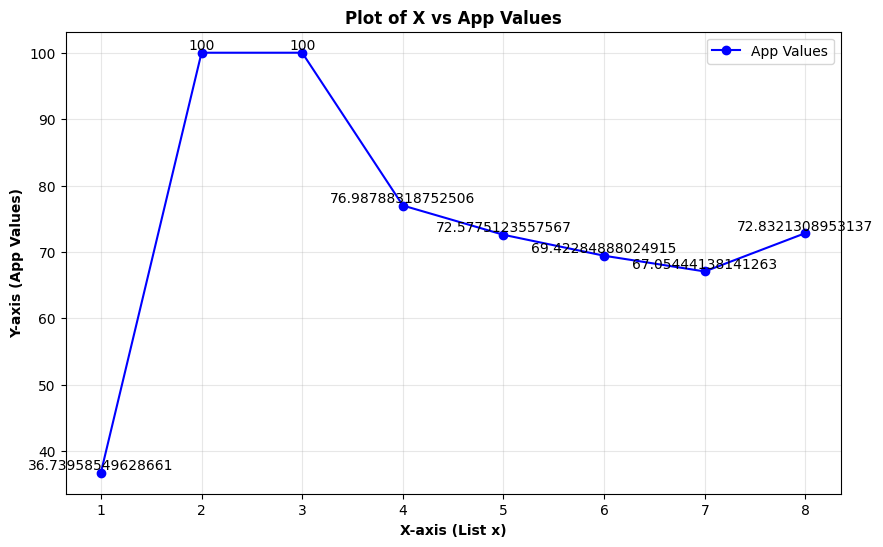

In [63]:
def calculate_overlap_percentage(data1, data2, name):
    """Calculates the percentage of overlap between two datasets.

    Args:
        data1 (array-like): The first dataset.
        data2 (array-like): The second dataset.

    Returns:
        float: The percentage of overlap between the two datasets.
    """
    min1, max1 = np.min(data1), np.max(data1)
    min2, max2 = np.min(data2), np.max(data2)

    if max1 < min2 or max2 < min1:  # No overlap
        return 0.0

    overlap_min = max(min1, min2)
    overlap_max = min(max1, max2)
    overlap_range = overlap_max - overlap_min

    total_range = max(max1, max2) - min(min1, min2)
    overlap_percentage = (overlap_range / total_range) * 100

    print(f" ============= {name}-START=======================")
    print(f"overlap_min: {overlap_min:.4E}")
    print(f"overlap_max: {overlap_max:.4E}")
    print(f"overlap_range: {overlap_range:.4E}")
    print(f"total_range: {total_range:.4E}")
    print(f"overlap_percentage: {overlap_percentage:.4E}")
    print(f" ============= {name}-END  =======================")
    return overlap_percentage

def cal_percentage_asic_on_fpga(asic,fpga,name):
    fmax = np.max(fpga)
    fmin = np.min(fpga)
    amax = np.max(asic)
    amin = np.min(asic)
    f_range = fmax-fmin
    
    if(fmin>amax) or (amin>fmax):
        print("case1")
        final_percentage = 0
    elif (fmax>amax) and (fmin<amin):
        print("case2")
        final_percentage = 1
    elif (amax>fmin) and (fmax>amax):
        print("case3")
        final_percentage = (amax-fmin)/f_range
    elif (fmax>amin) and (fmax<amax):
        print("case4")
        final_percentage = (fmax-amin)/f_range
    else :
        print("Unknown")
        final_percentage = 0
    print("final_percentage",final_percentage)
    print(f" ============= {name} ==================")
    print(f"fmax: {fmax:.4E}")
    print(f"fmin: {fmin:.4E}")
    print(f"amax: {amax:.4E}")
    print(f"amin: {amin:.4E}")
    print(f"f_range: {f_range:.4E}")
    print(f" =======================================")
    final_percentage = final_percentage*100
    return final_percentage

overlap_per_napp1 = cal_percentage_asic_on_fpga(asic_data[0],fpga_data[0],name='Napp1')
overlap_per_napp2 = cal_percentage_asic_on_fpga(asic_data[1],fpga_data[1],name='Napp2')
overlap_per_napp3 = cal_percentage_asic_on_fpga(asic_data[2],fpga_data[2],name='Napp3')
overlap_per_napp4 = cal_percentage_asic_on_fpga(asic_data[3],fpga_data[3],name='Napp4')
overlap_per_napp5 = cal_percentage_asic_on_fpga(asic_data[4],fpga_data[4],name='Napp5')
overlap_per_napp6 = cal_percentage_asic_on_fpga(asic_data[5],fpga_data[5],name='Napp6')
overlap_per_napp7 = cal_percentage_asic_on_fpga(asic_data[6],fpga_data[6],name='Napp7')
overlap_per_napp8 = cal_percentage_asic_on_fpga(asic_data[7],fpga_data[7],name='Napp8')

y_vals = [overlap_per_napp1, overlap_per_napp2, overlap_per_napp3, overlap_per_napp4, overlap_per_napp5, overlap_per_napp6, overlap_per_napp7, overlap_per_napp8]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(categories, y_vals, marker='o', linestyle='-', color='b', label='App Values')  # Line plot
plt.xlabel('X-axis (List x)', fontweight='bold')
plt.ylabel('Y-axis (App Values)', fontweight='bold')
plt.title('Plot of X vs App Values', fontweight='bold')
plt.xticks(categories)  # Ensures all x points are labeled
plt.legend()
plt.grid(alpha=0.3)

# Add data values as text annotations
for x, y in zip(categories, y_vals):
    plt.text(x, y, str(y), ha='center', va='bottom')  # Adjust 'ha' and 'va' for text alignment


# Show plot
#plt.show()
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-ProbPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-ProbPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-ProbPlot.pdf")

#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-ProbPlot_randomsample-10k.pdf")
plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-ProbPlot_randomsample-10k.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-ProbPlot_randomsample-10k.pdf")

print(y_vals)
sum_y = sum(y_vals)
prob = [num/sum_y for num in y_vals]
print(prob)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[0.0, 64.1, 99.35000000000001, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.0, 0.09661617303489335, 0.14974753184113346, 0.1507272590247946, 0.1507272590247946, 0.1507272590247946, 0.1507272590247946, 0.1507272590247946]


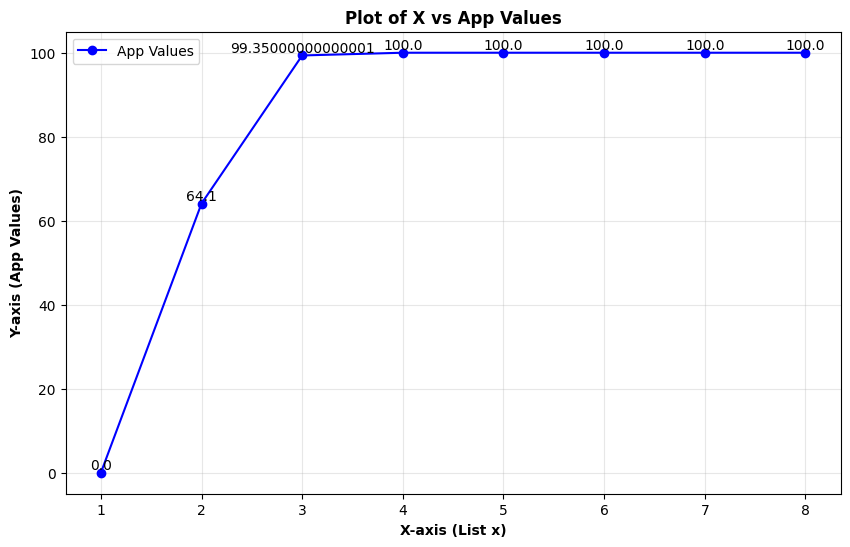

In [64]:
def calculate_overlap_percentage(data1, data2, name):
    """Calculates the percentage of overlap between two datasets.

    Args:
        data1 (array-like): The first dataset.
        data2 (array-like): The second dataset.

    Returns:
        float: The percentage of overlap between the two datasets.
    """
    min1, max1 = np.min(data1), np.max(data1)
    min2, max2 = np.min(data2), np.max(data2)

    if max1 < min2 or max2 < min1:  # No overlap
        return 0.0

    overlap_min = max(min1, min2)
    overlap_max = min(max1, max2)
    overlap_range = overlap_max - overlap_min

    total_range = max(max1, max2) - min(min1, min2)
    overlap_percentage = (overlap_range / total_range) * 100

    print(f" ============= {name}-START=======================")
    print(f"overlap_min: {overlap_min:.4E}")
    print(f"overlap_max: {overlap_max:.4E}")
    print(f"overlap_range: {overlap_range:.4E}")
    print(f"total_range: {total_range:.4E}")
    print(f"overlap_percentage: {overlap_percentage:.4E}")
    print(f" ============= {name}-END  =======================")
    return overlap_percentage

def cal_percentage_asic_on_fpga(asic,fpga,name):
    fmax = np.max(fpga)
    fmin = np.min(fpga)
    amax = np.max(asic)
    amin = np.min(asic)
    f_range = fmax-fmin
    
    if(fmin>amax) or (amin>fmax):
        print("case1")
        final_percentage = 0
    elif (fmax>amax) and (fmin<amin):
        print("case2")
        final_percentage = 1
    elif (amax>fmin) and (fmax>amax):
        print("case3")
        final_percentage = (amax-fmin)/f_range
    elif (fmax>amin) and (fmax<amax):
        print("case4")
        final_percentage = (fmax-amin)/f_range
    else :
        print("Unknown")
        final_percentage = 0
    print("final_percentage",final_percentage)
    print(f" ============= {name} ==================")
    print(f"fmax: {fmax:.4E}")
    print(f"fmin: {fmin:.4E}")
    print(f"amax: {amax:.4E}")
    print(f"amin: {amin:.4E}")
    print(f"f_range: {f_range:.4E}")
    print(f" =======================================")
    final_percentage = final_percentage*100
    return final_percentage

def cal_percentage_fpga_lower_than_asic(asic, fpga, name):
    ## Count how many FPGA values are lower than ASIC values
    #count_fpga_lower = np.sum(fpga < asic)
    
    # Count the number of times fpga is lower than asic
    count_fpga_lower = sum(1 for a, f in zip(asic, fpga) if f < a)
    
    count=0
    for v in range(len(fpga)):
        if fpga[v]<asic[v]:
            count = count+1
        print(v)
    print(count)
    
        

    # Total number of comparisons
    total_count = len(fpga)

    # Calculate the percentage
    if total_count == 0:
        final_percentage = 0  # Handle edge case of empty arrays
    else:
        final_percentage = (count_fpga_lower / total_count) * 100

    # Print results
    print(f" ============= {name} ==================")
    print(f"FPGA values lower than ASIC: {count_fpga_lower}")
    print(f"Total FPGA values: {total_count}")
    print(f"Percentage of FPGA lower than ASIC: {final_percentage:.2f}%")
    print(f" =======================================")
    
    return final_percentage

overlap_per_napp1 = cal_percentage_fpga_lower_than_asic(asic_data[0],fpga_data[0],name='Napp1')
overlap_per_napp2 = cal_percentage_fpga_lower_than_asic(asic_data[1],fpga_data[1],name='Napp2')
overlap_per_napp3 = cal_percentage_fpga_lower_than_asic(asic_data[2],fpga_data[2],name='Napp3')
overlap_per_napp4 = cal_percentage_fpga_lower_than_asic(asic_data[3],fpga_data[3],name='Napp4')
overlap_per_napp5 = cal_percentage_fpga_lower_than_asic(asic_data[4],fpga_data[4],name='Napp5')
overlap_per_napp6 = cal_percentage_fpga_lower_than_asic(asic_data[5],fpga_data[5],name='Napp6')
overlap_per_napp7 = cal_percentage_fpga_lower_than_asic(asic_data[6],fpga_data[6],name='Napp7')
overlap_per_napp8 = cal_percentage_fpga_lower_than_asic(asic_data[7],fpga_data[7],name='Napp8')

y_vals = [overlap_per_napp1, overlap_per_napp2, overlap_per_napp3, overlap_per_napp4, overlap_per_napp5, overlap_per_napp6, overlap_per_napp7, overlap_per_napp8]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(categories, y_vals, marker='o', linestyle='-', color='b', label='App Values')  # Line plot
plt.xlabel('X-axis (List x)', fontweight='bold')
plt.ylabel('Y-axis (App Values)', fontweight='bold')
plt.title('Plot of X vs App Values', fontweight='bold')
plt.xticks(categories)  # Ensures all x points are labeled
plt.legend()
plt.grid(alpha=0.3)

# Add data values as text annotations
for x, y in zip(categories, y_vals):
    plt.text(x, y, str(y), ha='center', va='bottom')  # Adjust 'ha' and 'va' for text alignment


# Show plot
#plt.show()
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-ProbPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-ProbPlot.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-ProbPlot.pdf")

#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/ASIC-v-FPGA-CFP-Total-ProbPlot_randomsample-v2-10k.pdf")
plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-ProbPlot_randomsample-v2-10k.pdf")
#plt.savefig(f"boxplot/final_box_plot/generated_files/plots/CPU-v-FPGA-CFP-Total-ProbPlot_randomsample-v2-10k.pdf")

print(y_vals)
sum_y = sum(y_vals)
prob = [num/sum_y for num in y_vals]
print(prob)

Napp1
Probability that x < y: 0.06522269
Napp2
Probability that x < y: 0.5074920200000004
Napp3
Probability that x < y: 0.7163556399999998
Napp4
Probability that x < y: 0.8018520899999977
Napp5
Probability that x < y: 0.8452254699999994
Napp6
Probability that x < y: 0.86897533
Napp7
Probability that x < y: 0.8843508000000005
Napp8
Probability that x < y: 0.8385970000000004


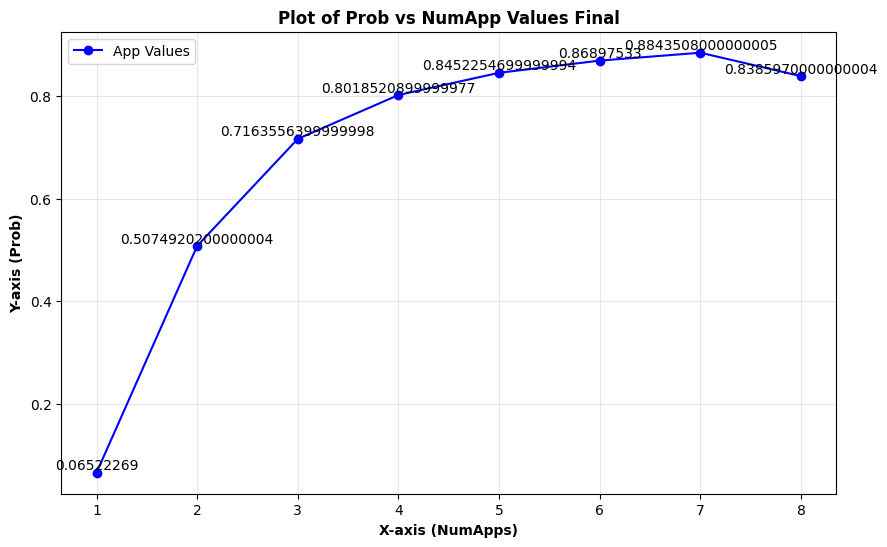

In [65]:

def calculate_prob_x_less_y(asic, fpga,name):
    # Step 1: Compute histograms for asic and fpga with 50 bins
    x_counts, x_bins = np.histogram(asic, bins=50, density=False)
    y_counts, y_bins = np.histogram(fpga, bins=50, density=False)

    # Step 2: Normalize histograms to probabilities
    x_probs = x_counts / np.sum(x_counts)
    y_probs = y_counts / np.sum(y_counts)

    # Step 3: Compute bin centers
    x_centers = (x_bins[:-1] + x_bins[1:]) / 2
    y_centers = (y_bins[:-1] + y_bins[1:]) / 2

    # Step 4: Compute P(x < y)
    prob_x_less_y = 0
    for i, x_center in enumerate(x_centers):
        for j, y_center in enumerate(y_centers):
            if x_center < y_center:
                prob_x_less_y += x_probs[i] * y_probs[j]

    # Print and return the result
    print(name)
    print(f"Probability that x < y: {prob_x_less_y}")
    return prob_x_less_y

overlap_per_napp1 = calculate_prob_x_less_y(fpga_data[0],asic_data[0],name='Napp1')
overlap_per_napp2 = calculate_prob_x_less_y(fpga_data[1],asic_data[1],name='Napp2')
overlap_per_napp3 = calculate_prob_x_less_y(fpga_data[2],asic_data[2],name='Napp3')
overlap_per_napp4 = calculate_prob_x_less_y(fpga_data[3],asic_data[3],name='Napp4')
overlap_per_napp5 = calculate_prob_x_less_y(fpga_data[4],asic_data[4],name='Napp5')
overlap_per_napp6 = calculate_prob_x_less_y(fpga_data[5],asic_data[5],name='Napp6')
overlap_per_napp7 = calculate_prob_x_less_y(fpga_data[6],asic_data[6],name='Napp7')
overlap_per_napp8 = calculate_prob_x_less_y(fpga_data[7],asic_data[7],name='Napp8')

y_vals = [overlap_per_napp1, overlap_per_napp2, overlap_per_napp3, overlap_per_napp4, overlap_per_napp5, overlap_per_napp6, overlap_per_napp7, overlap_per_napp8]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(categories, y_vals, marker='o', linestyle='-', color='b', label='App Values')  # Line plot
plt.xlabel('X-axis (NumApps)', fontweight='bold')
plt.ylabel('Y-axis (Prob)', fontweight='bold')
plt.title('Plot of Prob vs NumApp Values Final', fontweight='bold')
plt.xticks(categories)  # Ensures all x points are labeled
plt.legend()
plt.grid(alpha=0.3)

# Add data values as text annotations
for x, y in zip(categories, y_vals):
    plt.text(x, y, str(y), ha='center', va='bottom')  # Adjust 'ha' and 'va' for text alignment
    
plt.savefig(f"boxplot/final_box_plot/generated_files/plots/GPU-v-FPGA-CFP-Total-ProbPlot_randomsample-v3final-10k-4to32.pdf")